In [ ]:
import numpy as np

from src.metrics.ece import ece

In [ ]:

predictions = (np.random.rand(10000) + 1) / 2
predictions = np.column_stack((predictions, 1 - predictions))
labels = np.array(np.argmax(predictions, axis=1), dtype=np.int8)
true_ece = 0.05

ece_val, bin_counts = ece(predictions, labels, n_bins=15, return_bin_counts=True)

In [ ]:
print(ece_val)

In [ ]:
print(bin_counts)

In [ ]:

import pickle
from src.data_generation.datasets import gummy_worm_dataset_family
from sklearn.model_selection import train_test_split

datasets = gummy_worm_dataset_family()

X_trains = []
y_trains = []
X_tests = []
y_tests = []

for dataset in datasets:
    samples, labels = dataset.generate_data(10000)    
    X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.5, random_state=42)
    
    X_trains.append(X_train)
    y_trains.append(y_train)
    X_tests.append(X_test)
    y_tests.append(y_test)

# ensure numpy
X_trains = np.array(X_trains)
y_trains = np.array(y_trains)
X_tests = np.array(X_tests)
y_tests = np.array(y_tests)

print(X_trains.shape)
print(y_trains.shape)
print(X_tests.shape)
print(y_tests.shape)

subsample_sizes = np.linspace(100, 20000, 200, dtype=np.int64)
#for filename in filenames:
filename = "../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250405_032919.pkl"
with (open(filename, 'rb') as file):
    print(filename)
    results = pickle.load(file)
    
    ece_values = results["Means"]["ECE"]
    estimators = results['Estimators']

In [ ]:
bin_countsss = []
avg_eces = []
selected_sample_sizes = np.array([2500, 5000, 6300, 8800, 12500, 15000])
for sample_size in selected_sample_sizes:
    eces = []
    bin_countss = []
    for i, estimator in enumerate(estimators):
        p_pred = estimator.predict_proba(X_tests[i, :sample_size, :])
        ECE, bin_counts = ece(p_pred, y_tests[i, :sample_size], 15, return_bin_counts=True)
        bin_countss.append(bin_counts)
        eces.append(ECE)
    bin_countsss.append(bin_countss)
    avg_eces.append(np.mean(eces))
        
bin_countsss = np.array(bin_countsss)
avg_eces = np.array(avg_eces)

In [ ]:
print(bin_countsss)
print(avg_eces)

In [ ]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20, 10), constrained_layout=True)
axs = axs.flatten()

for i, sample_size in enumerate(selected_sample_sizes):
    print(np.mean(bin_countsss[i], axis=0))
    ax = axs[i]
    ax.bar(range(15), np.mean(bin_countsss[i], axis=0) / sample_size, alpha=0.8)
    ax.set_xlabel("selected sample sizes")
    ax.set_ylabel("average relative bin population")
    ax.set_title(f"Relative Bin Count on {sample_size} samples (ECE: {np.round(avg_eces[i], decimals=4)})", fontsize=12, fontweight="bold")
    ax.grid(True, linestyle='--', alpha=0.6)
    
plt.suptitle(f"Average Bin Count 20 Estimators", fontsize=14, fontweight="bold")
#plt.savefig("./")
plt.show()

In [ ]:
selected_indices = (selected_sample_sizes/100).astype(np.int32) - 1

selected_ece_values = np.array(ece_values)[selected_indices]

plt.figure(figsize=(10, 6), dpi=150)
plt.bar(selected_sample_sizes, avg_eces, width=1000, alpha=0.8)
plt.bar(selected_sample_sizes, selected_ece_values, width=1000, alpha=0.8)
plt.xlabel("selected sample sizes")
plt.ylabel("average eces")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Average ECEs", fontsize=14, fontweight="bold")
#plt.savefig("./")
plt.show()

In [75]:
import numpy as np

np.random.seed(67)
p_pred = np.array([[0.7, 0.3]] * 100000 + [[0.9, 0.1]] * 1000000)
p_true = np.column_stack((np.max(p_pred, axis=-1) - 0.2, np.min(p_pred, axis=-1) + 0.2))
#y_true = np.array([1 if np.random.rand() < p[1] else 0 for p in p_true])
y_true = np.argmax(p_true, axis=-1)

print(y_true)

[1 1 1 ... 0 0 0]


In [67]:
from src.metrics.true_ece import true_ece_binned
from src.metrics.ece import ece

TRUE_ECE, bin_count_true_ece, bin_errors_true_ece, bin_true_prob, bin_confidences_true_ece, bin_probs_true_ece = true_ece_binned(p_pred, p_true, np.linspace(0, 1, 16), return_metadata=True)
sample_sizes = np.linspace(100, p_pred.shape[0], 1000, dtype=np.int64)

eces = []
bin_counts = []
bin_errorss = []
bin_accuraciess = []
bin_confidencess = []
bin_probss = []
for i in sample_sizes:
    ECE, bin_count, bin_errors, bin_accuracies, bin_confidences, bin_probs = ece(p_pred[:i], y_true[:i], 15, return_metadata=True)
    eces.append(ECE)
    bin_counts.append(bin_count)
    bin_errorss.append(bin_errors)
    bin_accuraciess.append(bin_accuracies)
    bin_confidencess.append(bin_confidences)
    bin_probss.append(bin_probs)

print(TRUE_ECE, bin_count_true_ece)
print(eces)
print(np.array(bin_errorss)[:, -1])

0.20000000000000026 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100000, 0, 0, 1000000, 0]
[0.2800000000000002, 0.20624479600333062, 0.20521285838401399, 0.1936820452541873, 0.19444937833037323, 0.1933095450490634, 0.1961228750372801, 0.19506852824388354, 0.19517287831162988, 0.1933559796183434, 0.19558955895589558, 0.1973384653181557, 0.1984975961538461, 0.1985082911260666, 0.19909758927420373, 0.199006921456515, 0.19836306163919604, 0.19933570707339088, 0.1990962948087157, 0.1999286359960034, 0.1999547920433996, 0.19989233883123014, 0.2008634158375131, 0.20092435983164847, 0.2009425426029255, 0.20106787330316728, 0.2004525516953281, 0.200284976698964, 0.19977366787377127, 0.20039027131661918, 0.1999698158768486, 0.19989775349829086, 0.1992641231744593, 0.19913539922597634, 0.1998401449352586, 0.1994693930374013, 0.1999748339037648, 0.19930210348458488, 0.19902236635032655, 0.19963986152094593, 0.19972813774354314, 0.20018788267279664, 0.19967631953735254, 0.1997154480112976, 0.19981460118655214, 0

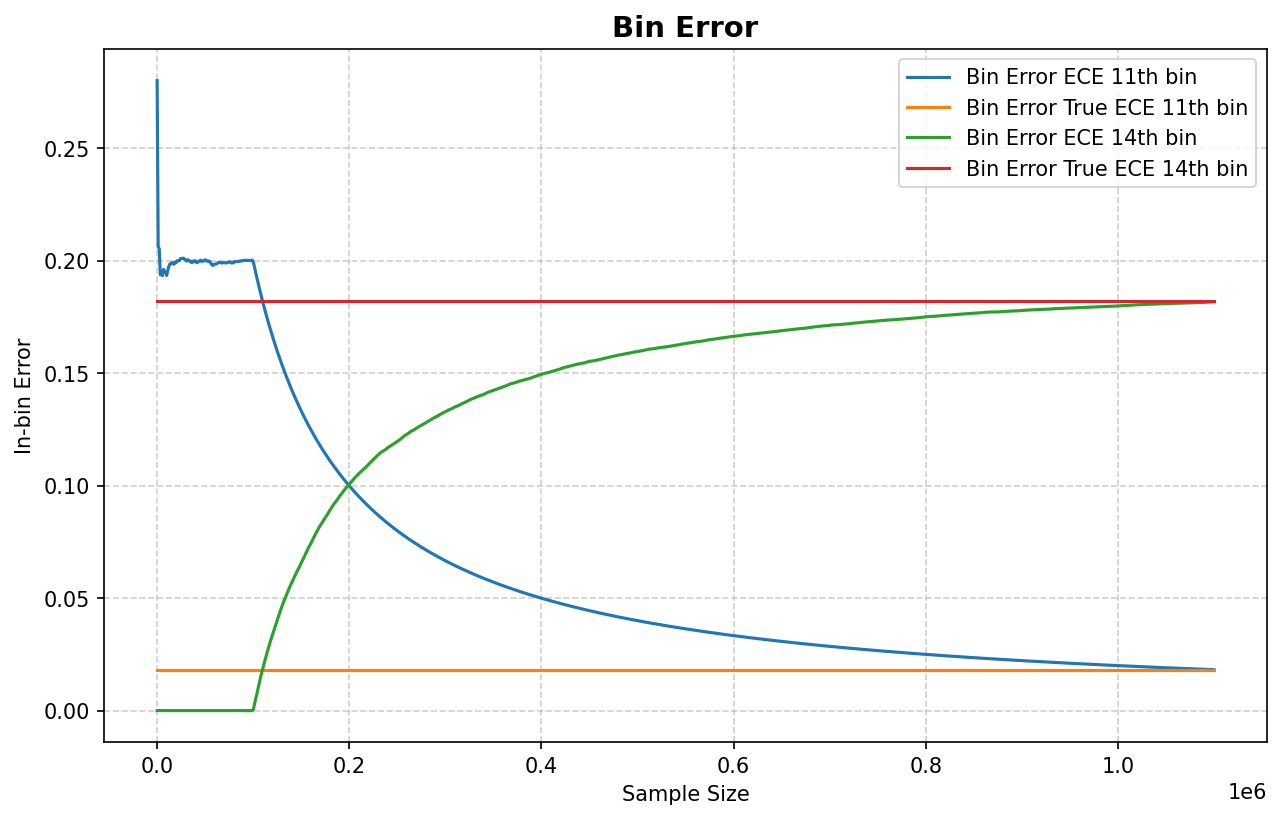

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=150)

for i in range(15):
    errors_in_ith_bin = np.array(bin_errorss)[:, i]
    if errors_in_ith_bin.any(where=lambda k: k != 0):
        plt.plot(sample_sizes, errors_in_ith_bin, label=f"Bin Error ECE {i+1}th bin")
    
    errors_in_ith_bin_true_ece = np.full(1000, bin_errors_true_ece[i])
    if bin_errors_true_ece[i] != 0:
        plt.plot(sample_sizes, errors_in_ith_bin_true_ece, label=f"Bin Error True ECE {i+1}th bin")
#plt.savefig("./True_ECE_under_approximation")
plt.title(f"Bin Error", fontsize=14, fontweight="bold")
plt.xlabel("Sample Size")
plt.ylabel("In-bin Error")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

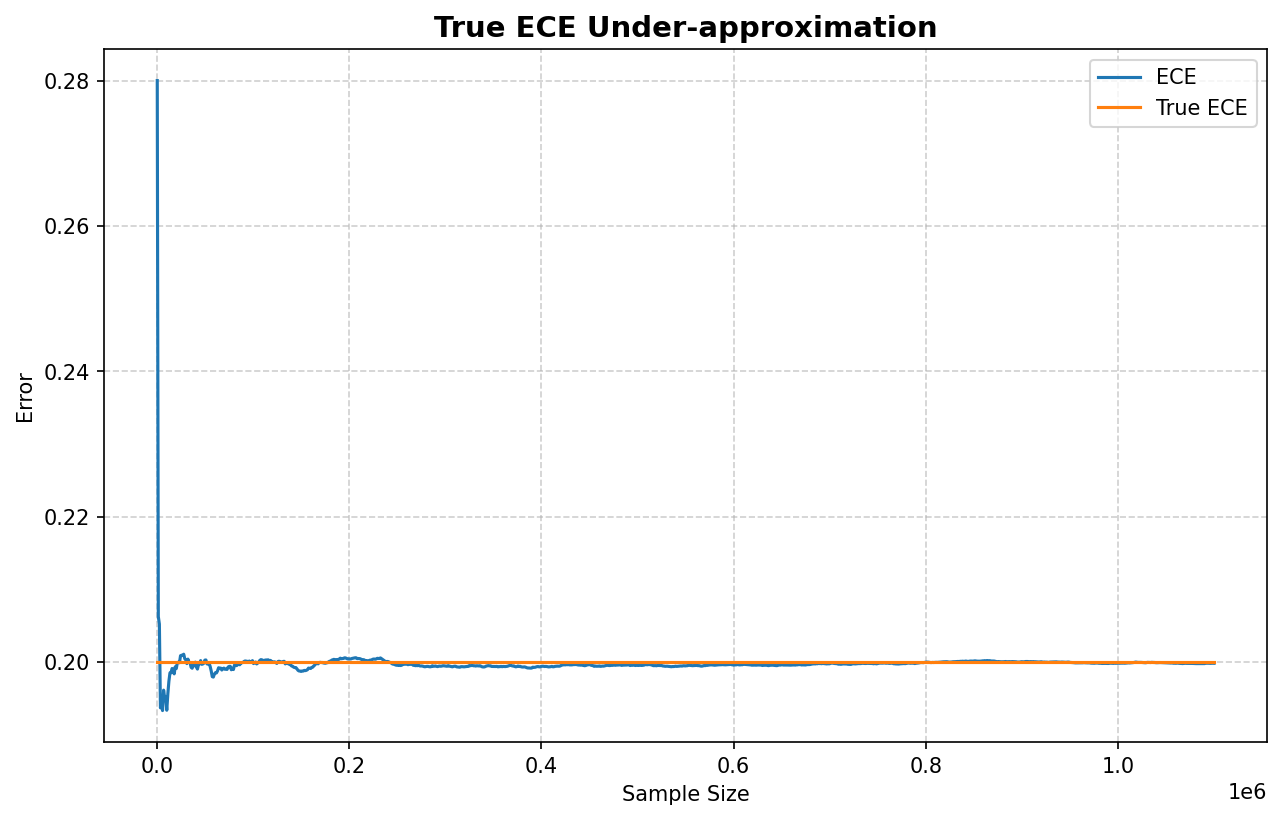

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(sample_sizes, eces, label="ECE")
plt.plot(sample_sizes, [TRUE_ECE] * len(sample_sizes), label="True ECE")
plt.xlabel("Sample Size")
plt.ylabel("Error")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("True ECE Under-approximation", fontsize=14, fontweight="bold")
#plt.ylim(0.199, 0.201)
plt.legend()
#plt.savefig("./True_ECE_under_approximation")
plt.show()


In [70]:
print("Bin Accuracies ECE", np.array(bin_accuraciess)[-1, :])
print("Bin Avg. True Probabilities True ECE", np.array(bin_true_prob))
print("Bin Confidences ECE", np.array(bin_confidencess)[-1, :])
print("Bin Confidences True ECE", np.array(bin_confidences_true_ece))
print("Bin probs ECE", np.array(bin_probss)[-1, :])

print("Calc. Bin Errors", np.abs(np.array(bin_accuraciess)[-1, :] - np.array(bin_confidencess)[-1, :]) * np.array(bin_probss)[-1, :])
print("Bin Errors", np.array(bin_errorss)[-1, :])
print("Bin Errors True ECE", bin_errors_true_ece)
print("Bin Error Diff.", np.round(np.array(bin_errorss)[-1, :] - bin_errors_true_ece, decimals=6))

Bin Accuracies ECE [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.50016  0.       0.       0.700186 0.      ]
Bin Avg. True Probabilities True ECE [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.7 0. ]
Bin Confidences ECE [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.  0.  0.9 0. ]
Bin Confidences True ECE [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.  0.  0.9 0. ]
Bin probs ECE [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.09090909 0.
 0.         0.90909091 0.        ]
Calc. Bin Errors [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01816727 0.
 0.         0.18164909 0.        ]
Bin Errors [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01816727 0.
 0.         0.18164909 0.        ]
Bin Errors True ECE [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.018181818181818177, 0, 0, 0

In [74]:
print(eces[-1])
print(TRUE_ECE)
#print(np.where(np.array(eces) > 0.2)) 

0.1998163636363653
0.20000000000000026


In [ ]:
### Diminishing in-bin-error results into True ECE under-approximation (depends on true labels???)
### ECE does not always approach True ECE from "above"? Also temporary under-approximation is valid???